### Import libraries

In [1]:
import os
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate, RepeatedKFold

### List of directories with corresponding paths:

In [2]:
main_dir = os.path.join(os.getcwd())
data_dir = os.path.join(main_dir, "Data")
shapefiles_dir = os.path.join(main_dir, data_dir, "shapefiles")

# Read in merged dataset that includes Crime with COVID case data

In [3]:
daily_crime_during_covid_df = pd.read_csv(os.path.join(data_dir, 'daily_crime_during_COVID.csv'), index_col=0)

In [4]:
daily_crime_during_covid_df.head()

,date,daily_crime_count,covid_daily_case_count,covid_deaths,CT_ARSON_DR,CT_ASSAULT_DR,CT_BURGLARY_DR,CT_HOMICIDE_DR,CT_MOTOR_THEFT_DR,CT_ROBBERY_DR,...,CL_WARD_2_DR,CL_WARD_3_DR,CL_WARD_4_DR,CL_WARD_5_DR,CL_WARD_6_DR,CL_WARD_7_DR,CL_WARD_8_DR,CO_SHIFT_MORNING_DR,CO_SHIFT_EVENING_DR,CO_SHIFT_MIDNIGHT_DR
0,2020-03-07,65,1,0,0,3,2,0,6,3,...,13,6,7,10,5,7,5,28,25,12
1,2020-03-08,56,1,0,0,1,1,0,7,7,...,9,1,5,8,11,5,6,17,22,17
2,2020-03-09,82,4,0,0,3,1,0,4,1,...,14,7,12,12,14,16,2,28,38,16
3,2020-03-10,71,4,0,0,5,8,1,6,1,...,19,3,5,9,11,8,8,28,26,17
4,2020-03-11,70,10,0,0,0,3,0,4,1,...,15,3,11,8,12,8,5,27,26,17


In [5]:
# get X and y
y = daily_crime_during_covid_df.pop('daily_crime_count')
X = daily_crime_during_covid_df.drop(columns=['date'])

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [6]:
X_train.shape

(415, 22)

In [7]:
y_train.shape

(415,)

In [8]:
X_test.shape

(179, 22)

In [9]:
y_test.shape

(179,)

## Linear Regression - sklearn

In [10]:
# instantiate model
lr = LinearRegression()
# fit model
lr.fit(X_train, y_train)
# make predictions
y_pred = lr.predict(X_test)

In [11]:
# evaluate model
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)
r_squared = r2_score(y_test, y_pred)
print('R squared value:', r_squared)

Mean squared error: 3.4823757850902795e-26
R squared value: 1.0


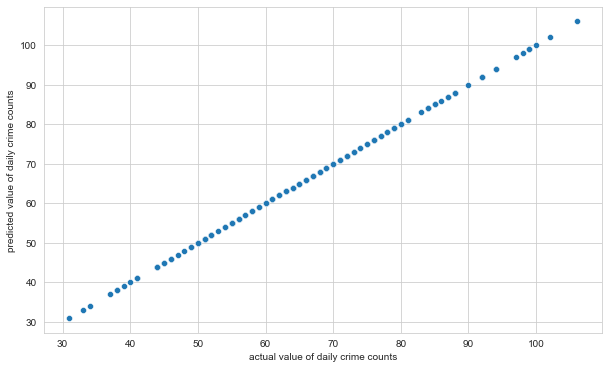

In [12]:
# visualize model performance
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('actual value of daily crime counts')
plt.ylabel('predicted value of daily crime counts')
plt.show()

In [13]:
# see coefficients
coefs = [(col, coef) for col, coef in zip(X.columns, lr.coef_)] 
coefs = sorted(coefs, key=lambda x: x[1], reverse=True)
coefs

[('CO_SHIFT_MORNING_DR', 0.5853658536585379),
 ('CO_SHIFT_EVENING_DR', 0.5853658536585367),
 ('CO_SHIFT_MIDNIGHT_DR', 0.5853658536585366),
 ('CL_WARD_6_DR', 0.21951219512195233),
 ('CL_WARD_2_DR', 0.21951219512195208),
 ('CL_WARD_5_DR', 0.21951219512195186),
 ('CL_WARD_4_DR', 0.21951219512195183),
 ('CL_WARD_7_DR', 0.21951219512195164),
 ('CL_WARD_1_DR', 0.2195121951219516),
 ('CL_WARD_3_DR', 0.2195121951219516),
 ('CL_WARD_8_DR', 0.21951219512195136),
 ('CT_ARSON_DR', 0.195121951219518),
 ('CT_THEFT_FROM_OTHER_DR', 0.19512195121951315),
 ('CT_MOTOR_THEFT_DR', 0.1951219512195129),
 ('CT_THEFT_FROM_CAR_DR', 0.1951219512195129),
 ('CT_BURGLARY_DR', 0.1951219512195124),
 ('CT_ROBBERY_DR', 0.1951219512195117),
 ('CT_SEX_ABUSE_DR', 0.19512195121951123),
 ('CT_HOMICIDE_DR', 0.19512195121951037),
 ('CT_ASSAULT_DR', 0.19512195121951026),
 ('covid_deaths', 1.4693107841523556e-15),
 ('covid_daily_case_count', -1.895041737182412e-17)]

### –––––––––> coefficients for covid variables are the smallest 

## check linear regression with statsmodels

In [14]:
# see stats with statsmodels library
sm_pred = sm.ols('y ~ X', data=X).fit() 

In [15]:
print(sm_pred.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.789e+28
Date:                Tue, 16 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:13:05   Log-Likelihood:                 16043.
No. Observations:                 594   AIC:                        -3.204e+04
Df Residuals:                     573   BIC:                        -3.195e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.865e-14   1.04e-13      0.179      0.8

## Use k-fold cross validation to see variability in coefficients for different iterations

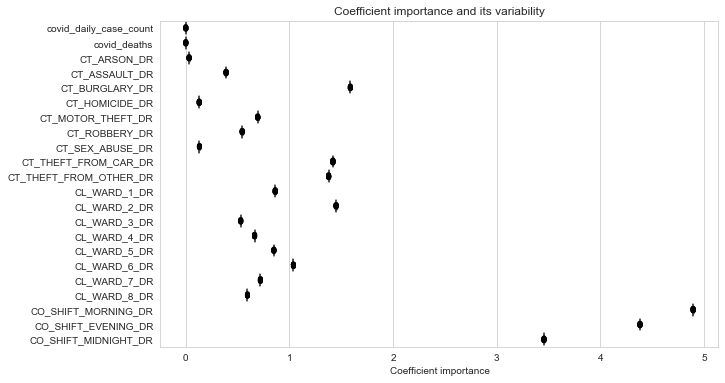

In [16]:
# k-fold cross validate
cv_model = cross_validate(lr, X_train, y_train, 
                         cv=RepeatedKFold(n_splits=5, n_repeats=5), 
                         return_estimator=True)
cv_coefs = pd.DataFrame([est.coef_ * X_train.std(axis=0) for est in cv_model["estimator"]], columns=X.columns)
plt.figure(figsize=(10,6))
sns.stripplot(data=cv_coefs, orient='h', color='k', alpha=0.5)
sns.boxplot(data=cv_coefs, orient='h', color='cyan', saturation=0.5)
plt.xlabel("Coefficient importance")
plt.title("Coefficient importance and its variability")
plt.show()